# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

### **1. KNN 적용**

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from mlxtend.plotting import plot_decision_regions

### 붓꽃 데이터

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 1.0


In [ ]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([0.00169683, 0.00161052, 0.00132585, 0.00103307, 0.00114775]),
 'score_time': array([0.00476241, 0.00416923, 0.00321674, 0.00306392, 0.00330281]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors' : [3,5,7],
               'weights' : ['uniform', 'distance'],
               'algorithm': ['ball_tree','kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator  = KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [ ]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9583333333333334


In [ ]:
model2 = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
model2.fit(X_train,y_train)
predict = model2.predict(X_test)

In [ ]:
print(predict)

[0 2 2 2 1 1 1 1 0 2 1 2 0 2 0 2 2 2 0 1 0 0 2 1 2 0 2 1 1 0]


In [ ]:
#### Plot_decision_regions를 사용하지 않는 시각화

def make_meshgird(x,y,h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
  return xx, yy

def plot_contours(clf,xx,yy,**params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy,Z,**params)

  return out


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-29.321915,-0.003718,0
1,-31.954321,0.980614,0
2,-31.845562,-0.224450,0
3,-32.284481,0.175697,0
4,-29.371887,-0.424129,0
...,...,...,...
145,15.995969,1.872558,2
146,12.964085,0.935481,2
147,15.125164,1.614940,2
148,16.614311,2.379776,2


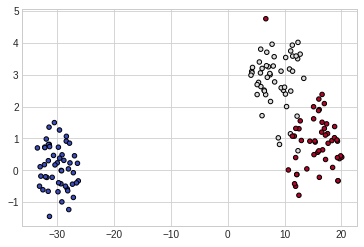

In [ ]:
plt.scatter(X_comp[:,0],X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


In [ ]:
model3 = KNeighborsClassifier()
model3.fit(X_comp,y)
predict = model3.predict(X_comp)

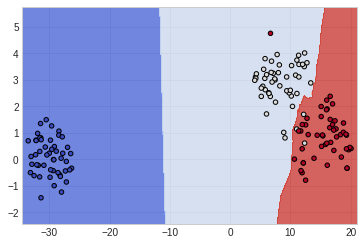

In [ ]:
xx, yy = make_meshgird(X_comp[:,0],X_comp[:,1])
plot_contours(model3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20, edgecolors='k')



---
### **과제-3**

- 책 94~104 code 실행해보고 자유형식으로 제출

- skitlearn 에서 유방암 데이터를 불러와 KNN 적용해보기.


---




#### **유방암 데이터**


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **2. 커널분포함수 추정(Kernel density estimation)**

**분포의 형태에 대해서 적은 수의 가정만을 하는 nonparametric인 밀도 추정 방법이다.**

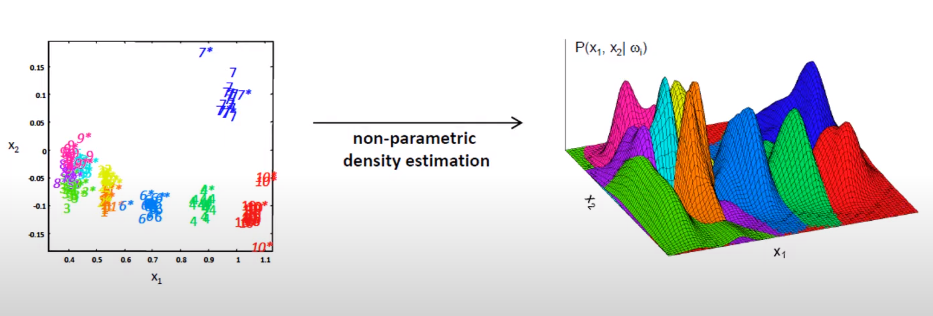

유클리디안 D차원 공간의 알려지지 않은 확률 밀도 $p(x)$로부터 관측값들을 추출했고 이 관측값들을 바탕으로 $p(x)$의 값을 추정하려 한다고 해보자. $p(x)$로부터 관측된 데이터가 어떠한 영역 $R$에 대하여 들어올 확률을 계산하면, 다음과 같은 식을 얻을 수 있다.

$$P= \int_R p(x)dx$$

$p(x)$로부터 추출한 $N$개의 관측값들이 영역$R$에 포함된 확률이 $P$라고 하면 $N$개중 $K$개의 포인트들이 구역 $R$안에 존재할 확률을 다음과 같이 이항분포로 표현할 수 있다.

$$Bin(K|N,P) = {N! \over K!(N-K)!}P^K(1-P)^{N-K}$$

위 식을 이용해서 관측치들의 일부가 구역 $R$ 에 존재할 확률의 기댓값과 분산을 구하면\
\
$$E\left[{K\over N}\right]= P,\ Var\left[{K\over N}\right]= {P(1-P)\over N}$$\
\
이 된다는 것을 알 수 있다.\
\
\
이때,$\ N → \infty$이면 결국 $N$개 중에 $K$가 $R$에 속할 확률은 다음과 같다. 

$$P≅{k\over N}$$



영역 $R$이 점점 작아지면 $p(x_1) = p(x_2) = p(x')$ 이다.

따라서 $$P = \int_R p(x')dx' \cong p(x) V$$가 가능하다.

즉, $$p(x) = {k \over NV}$$\
\
위 식에서 **K**를 고정시키고 **V**를 결정하면 **KNN density estimation** 이고,\
\
**V**를 고정시키고 **K**를 결정하면 **Kernel-density estimation**이 된다.

- **KNN density estimation**
  - **Parzen Window Density Estimation**\
  \
    추정하고자 하는 확률밀도 함수 $p(X)$의 위치가 주어져 있고,hypercube의 중심이 $x$이고 각각의 cube의 변의 길이가 $h$라고 할 때 **kernel fuction** 
$K(u)$ 는 다음과 같이 정의된다.

  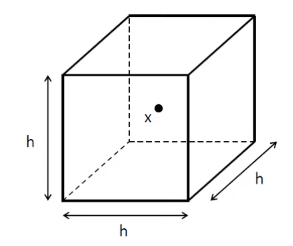

$$K(u)=
\begin{cases}
1 & \mbox{|$u_j|<{1 \over 2}\ ∀j=1,...D $}\\
0, & otherwise
\end{cases}$$

관측된점이 **hypercube**에 있으면 1 없으면 0에 해당된다. 따라서 관측된 데이터의 개수($k$)의 함수를 다음과 같이 표현할 수 있다.

$$k=\sum_{i=1}^N K\left(x^i-x\over h\right)$$

$k$의 식을 $p(x) = {k \over NV}$에 대입하면 다음과 같이 $x$에서의 밀도식을 구할 수가 있다.

$$p(x) =  {1\over Nh^d}\sum_{i=1}^N K\left(x^i-x\over h\right)$$

**hypercube**의 경계면이 불연속면에 해당하므로 더 매끄러운 밀도 모델을 구할 수가 있다. 일반적으로 사용되는 매끄러운 커널 함수는 **가우시안 함수**다. 이를 이용할 경우 다음의 커널 밀도 모델을 얻게 된다.

$$p(x) = {1\over N}\sum_{n=1}^N {1 \over (2\pi h^2)^{D\over2}}exp\left \{-{\lVert x^i-x \rVert^2 \over 2h^2}\right \} $$